C:\Users\chris\PycharmProjects\MachineLearning\venv\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\chris\PycharmProjects\MachineLearning\venv\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\chris\PycharmProjects\MachineLearning\venv\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set o

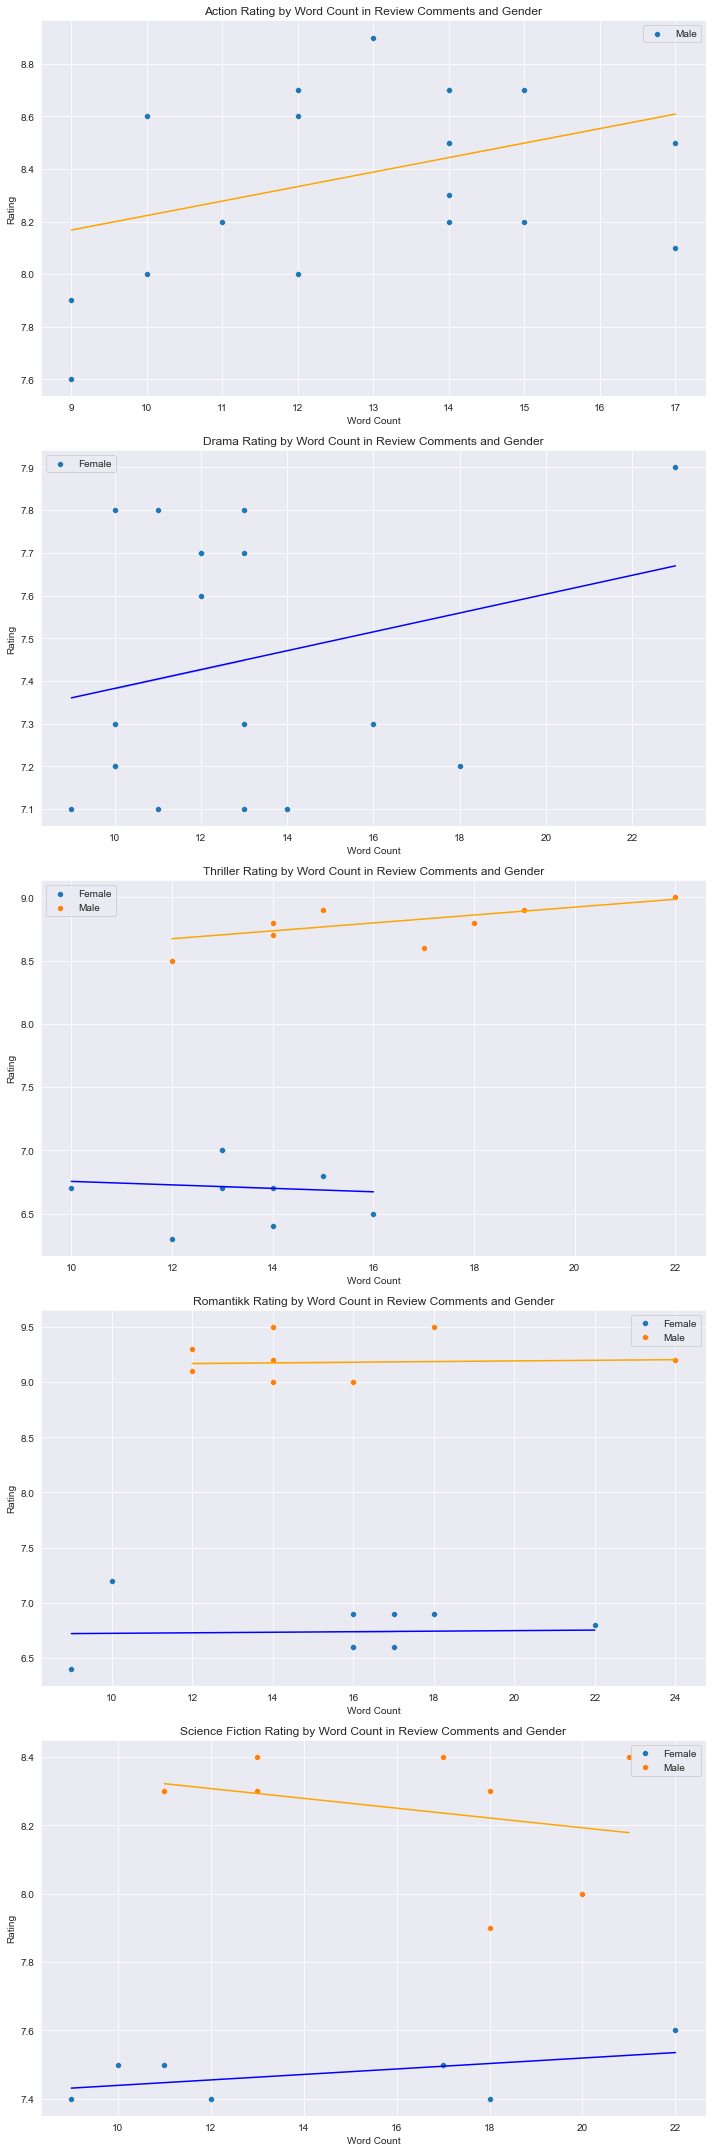

,id,rating,review_comment,genre,gender
0,1,8.5,Fantastisk film! Anbefales på det sterkeste. S...,Action,M
1,2,7.2,En fin dramafilm med gode skuespillerprestasjo...,Drama,F
2,3,9.0,Dette er en spennende thriller som holder deg ...,Thriller,M
3,4,6.8,En romantisk film med en hjertevarmende histor...,Romantikk,F
4,5,8.3,Fantastisk visuell effekter og et spennende pl...,Science Fiction,M
...,...,...,...,...,...
95,96,8.3,En episk science fiction-film med fantastiske ...,Science Fiction,M
96,97,7.7,En dramafilm som utforsker komplekse temaer og...,Drama,F
97,98,8.5,En actionfylt film med spenning fra start til ...,Action,M
98,99,7.0,En spennende thriller som holder deg på kanten...,Thriller,F


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('movie_review.csv')

# Define the genres
genres = df['genre'].unique()

# Create subplots for each genre
fig, axes = plt.subplots(nrows=len(genres), ncols=1, figsize=(10, 6 * len(genres)))

# Iterate over each genre
for i, genre in enumerate(genres):
    # Filter data for the current genre
    genre_data = df[df['genre'] == genre]
    
    # Separate ratings and review comments by gender
    female_data = genre_data[genre_data['gender'] == 'F']
    male_data = genre_data[genre_data['gender'] == 'M']
    
    # Preprocess review comments to count words
    female_data.loc[:, 'word_count'] = female_data['review_comment'].apply(lambda x: len(x.split()))
    male_data.loc[:, 'word_count'] = male_data['review_comment'].apply(lambda x: len(x.split()))

    
    # Plot female and male review comments
    sns.scatterplot(x='word_count', y='rating', data=female_data, ax=axes[i], label='Female')
    sns.scatterplot(x='word_count', y='rating', data=male_data, ax=axes[i], label='Male')
    
    # Fit linear regression models
    if not female_data.empty:
        reg_female = LinearRegression().fit(female_data['word_count'].values.reshape(-1, 1), female_data['rating'].values.reshape(-1, 1))
        sns.lineplot(x=female_data['word_count'], y=reg_female.predict(female_data['word_count'].values.reshape(-1, 1)).flatten(), ax=axes[i], color='blue')
    if not male_data.empty:
        reg_male = LinearRegression().fit(male_data['word_count'].values.reshape(-1, 1), male_data['rating'].values.reshape(-1, 1))
        sns.lineplot(x=male_data['word_count'], y=reg_male.predict(male_data['word_count'].values.reshape(-1, 1)).flatten(), ax=axes[i], color='orange')
    
    axes[i].set_title(f'{genre} Rating by Word Count in Review Comments and Gender')
    axes[i].set_xlabel('Word Count')
    axes[i].set_ylabel('Rating')
    axes[i].legend()

plt.tight_layout()
plt.show()    

data_panda = pd.DataFrame(df)
display(data_panda)


C:\Users\chris\PycharmProjects\MachineLearning\venv\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\chris\PycharmProjects\MachineLearning\venv\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\chris\PycharmProjects\MachineLearning\venv\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set o

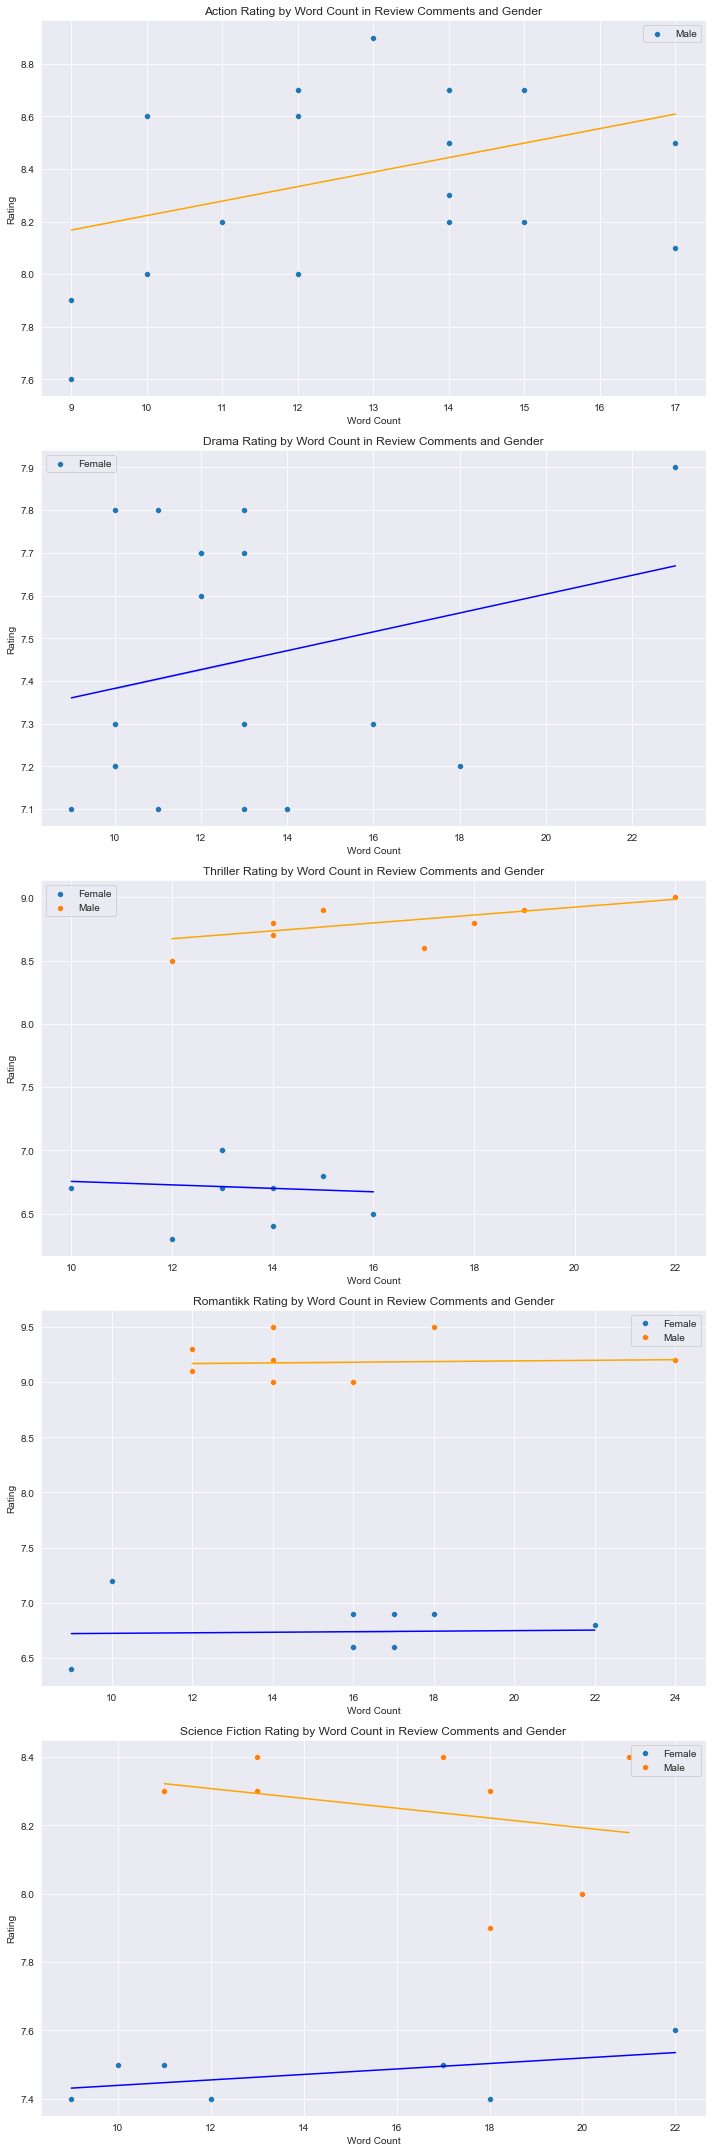

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('movie_review.csv')

# Define the genres
genres = df['genre'].unique()

# Create subplots for each genre
fig, axes = plt.subplots(nrows=len(genres), ncols=1, figsize=(10, 6 * len(genres)))

# Iterate over each genre
for i, genre in enumerate(genres):
    # Filter data for the current genre
    genre_data = df[df['genre'] == genre]
    
    # Separate ratings and review comments by gender
    female_data = genre_data[genre_data['gender'] == 'F']
    male_data = genre_data[genre_data['gender'] == 'M']
    
    # Preprocess review comments to count words
    female_data.loc[:, 'word_count'] = female_data['review_comment'].apply(lambda x: len(x.split()))
    male_data.loc[:, 'word_count'] = male_data['review_comment'].apply(lambda x: len(x.split()))

    
    # Plot female and male review comments
    sns.scatterplot(x='word_count', y='rating', data=female_data, ax=axes[i], label='Female')
    sns.scatterplot(x='word_count', y='rating', data=male_data, ax=axes[i], label='Male')
    
    # Fit linear regression models
    if not female_data.empty:
        reg_female = LinearRegression().fit(female_data['word_count'].values.reshape(-1, 1), female_data['rating'].values.reshape(-1, 1))
        sns.lineplot(x=female_data['word_count'], y=reg_female.predict(female_data['word_count'].values.reshape(-1, 1)).flatten(), ax=axes[i], color='blue')
    if not male_data.empty:
        reg_male = LinearRegression().fit(male_data['word_count'].values.reshape(-1, 1), male_data['rating'].values.reshape(-1, 1))
        sns.lineplot(x=male_data['word_count'], y=reg_male.predict(male_data['word_count'].values.reshape(-1, 1)).flatten(), ax=axes[i], color='orange')
    
    axes[i].set_title(f'{genre} Rating by Word Count in Review Comments and Gender')
    axes[i].set_xlabel('Word Count')
    axes[i].set_ylabel('Rating')
    axes[i].legend()

plt.tight_layout()
plt.show()    
